In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset principal
df_consumo_agregado = pd.read_parquet('consumo_agregado.parquet')
print("\n--- 1. Consumo Agregado ---")
df_consumo_agregado.info()
print("\nPrimeras filas del Consumo Agregado:")
df_consumo_agregado.head()


--- 1. Consumo Agregado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963419 entries, 0 to 963418
Data columns (total 7 columns):
 #   Column                                                                             Non-Null Count   Dtype 
---  ------                                                                             --------------   ----- 
 0   Secció censal/Sección censal/Census section                                        962324 non-null  object
 1   Districte/Distrito/District                                                        962324 non-null  object
 2   Municipi/Municipio/Municipality                                                    963419 non-null  object
 3   Data/Fecha/Date                                                                    963419 non-null  object
 4   Ús/Uso/Use                                                                         963419 non-null  object
 5   Nombre de comptadors/Número de contadores/Number of meters              

,Secció censal/Sección censal/Census section,Districte/Distrito/District,Municipi/Municipio/Municipality,Data/Fecha/Date,Ús/Uso/Use,Nombre de comptadors/Número de contadores/Number of meters,Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)
0,801901001,1,BARCELONA,2023-01-01,Comercial/Comercial/Commercial,64,14258
1,801901001,1,BARCELONA,2023-01-01,Domèstic/Doméstico/Domestic,395,11089
2,801901001,1,BARCELONA,2023-01-01,Industrial/Industrial/Industrial,20,490360
3,801901001,1,BARCELONA,2023-01-02,Comercial/Comercial/Commercial,64,6780
4,801901001,1,BARCELONA,2023-01-02,Domèstic/Doméstico/Domestic,395,11571


In [9]:
# Mostrar Distritos
print("\n--- Distritos Unicos en df_barcelona ---")
distritos_unicos = df_consumo_agregado['Districte/Distrito/District'].unique().tolist()
distritos_unicos



--- Distritos Unicos en df_barcelona ---


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '03', '06', '>', None]

In [10]:
# Mostrar Municipios
print("\n--- Municipios Unicos en df_barcelona ---")
municipios_unicos = df_consumo_agregado['Municipi/Municipio/Municipality'].unique().tolist()
unique_municipios


--- Municipios Unicos en df_barcelona ---


['BARCELONA']

In [11]:
# Cargar el dataset de fuites
df_fugas = pd.read_parquet('/content/Fuites')
print("\n--- 2. Fugas ---")
df_fugas.info()
print("\nPrimeras filas de Fugas:")
df_fugas.head()


--- 2. Fugas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121834 entries, 0 to 121833
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   POLIZA_SUMINISTRO    121834 non-null  object        
 1   NUMEROSERIECONTADOR  121834 non-null  object        
 2   CONSUMO_REAL         106983 non-null  float64       
 3   FECHA_HORA           121834 non-null  datetime64[us]
 4   DATA_INI_FACT        121834 non-null  object        
 5   DATA_FIN_FACT        121834 non-null  object        
 6   CREATED_MENSAJE      99400 non-null   datetime64[us]
 7   CODIGO_MENSAJE       99400 non-null   object        
 8   TIPO_MENSAJE         99400 non-null   object        
dtypes: datetime64[us](2), float64(1), object(6)
memory usage: 8.4+ MB

Primeras filas de Fugas:


,POLIZA_SUMINISTRO,NUMEROSERIECONTADOR,CONSUMO_REAL,FECHA_HORA,DATA_INI_FACT,DATA_FIN_FACT,CREATED_MENSAJE,CODIGO_MENSAJE,TIPO_MENSAJE
0,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,9.0,2024-01-01 00:29:14,2024-01-24,2024-03-26,NaT,None,None
1,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 01:29:14,2024-01-24,2024-03-26,NaT,None,None
2,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,10.0,2024-01-01 02:29:14,2024-01-24,2024-03-26,NaT,None,None
3,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 03:29:14,2024-01-24,2024-03-26,NaT,None,None
4,U2DVJQEKG3Y56QXB,62TNP5RI2GUII6WB,7.0,2024-01-01 04:29:14,2024-01-24,2024-03-26,NaT,None,None


In [12]:
# Renombrado de df.consumo_agregado
df_barcelona = df_consumo_agregado.rename(columns={
    'Secció censal/Sección censal/Census section': 'SECCION_CENSAL',
    'Districte/Distrito/District': 'DISTRITO',
    'Municipi/Municipio/Municipality': 'MUNICIPIO',
    'Data/Fecha/Date': 'FECHA',
    'Ús/Uso/Use': 'USO',
    'Nombre de comptadors/Número de contadores/Number of meters': 'NUM_CONTADORES',
    'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)': 'CONSUMO_L_DIA'
})

# Conversión de tipos
df_barcelona['FECHA'] = pd.to_datetime(df_barcelona['FECHA'], format='%Y-%m-%d')

# --- B. LIMPIEZA DE CATEGORÍAS Y GEOGRAFÍA ---
# Limpieza de la columna USO (ej: 'Commercial/Comercial/Commercial' -> 'Commercial')
df_barcelona['USO'] = df_barcelona['USO'].astype(str).str.split('/').str[-1].str.strip()

# Limpieza de DISTRITO
# 1. Convertir a string y quitar espacios
df_barcelona['DISTRITO'] = df_barcelona['DISTRITO'].astype(str).str.strip()

# 2. Normalizar '03' → '3' y '06' → '6' Hemos visto que es un error en los datos pues sólo hay 10 distritos en Barcelona
df_barcelona['DISTRITO'] = df_barcelona['DISTRITO'].replace({'03': '3', '06': '6'})

# 3. Eliminar valores anómalos (>, None, nan, nulos)
df_barcelona = df_barcelona[
    ~df_barcelona['DISTRITO'].isin(['>', 'None', 'nan']) &
    df_barcelona['DISTRITO'].notna()
].copy()

# Eliminar duplicados
df_barcelona = df_barcelona.drop_duplicates().copy()

print("1. Limpieza de Consumo Agregado completada. DataFrame: df_barcelona")
print(f"   Registros finales: {len(df_barcelona):,}")
print("   Columnas clave limpias: FECHA, USO, DISTRITO, CONSUMO_L_DIA")

1. Limpieza de Consumo Agregado completada. DataFrame: df_barcelona
   Registros finales: 961,229
   Columnas clave limpias: FECHA, USO, DISTRITO, CONSUMO_L_DIA


In [ ]:
# Renombrado de df_fugas
df_fugas = df_fuites.rename(columns={
    'POLIZA_SUMINISTRO': 'POLIZA',
    'NUMEROSERIECONTADOR': 'NUM_SERIE_CONTADOR',
    'CONSUMO_REAL': 'CONSUMO_REAL',
    'FECHA_HORA': 'FECHA_HORA',
    'DATA_INI_FACT': 'FECHA_INICIO',
    'DATA_FIN_FACT': 'FECHA_FIN',
    'CREATED_MENSAJE': 'FECHA_CREACION_MENSAJE',
    'CODIGO_MENSAJE': 'CODIGO_MENSAJE',
    'TIPO_MENSAJE': 'TIPO_MENSAJE'
})

# Conversión de tipos
df_fugas['FECHA_INICIO'] = pd.to_datetime(df_fugas['FECHA_INICIO'], format='%Y-%m-%d')
df_fugas['FECHA_FIN'] = pd.to_datetime(df_fugas['FECHA_FIN'], format='%Y-%m-%d')

# Eliminar duplicados
df_fugas = df_fugas.drop_duplicates()

print("\n✅ 2. Limpieza de Fugas completada. DataFrame: df_fugas")
print(f"   Registros finales: {len(df_fugas):,}")
print(f"   Registros con mensaje: {df_fugas['CODIGO_MENSAJE'].notna().sum():,} ({df_fugas['CODIGO_MENSAJE'].notna().sum()/len(df_fugas)*100:.1f}%)")
print(f"   Tipos de mensaje únicos: {df_fugas['TIPO_MENSAJE'].nunique()}")


✅ 2. Limpieza de Fugas completada. DataFrame: df_fugas
   Registros finales: 121,834
   Registros con mensaje: 99,400 (81.6%)
   Tipos de mensaje únicos: 2



FASE 1.A: ANÁLISIS DE CONSUMO POR TIPO DE USO

📊 RESUMEN POR TIPO DE USO:
       USO  CONSUMO_L_DIA  NUM_CONTADORES  CONSUMO_PROMEDIO_CONTADOR  PORCENTAJE_CONSUMO
Industrial    11913037901         1231840                9670.929586           52.912189
  Domestic     7559927603       217270208                  34.795049           33.577692
Commercial     3041766989        22492787                 135.232997           13.510118


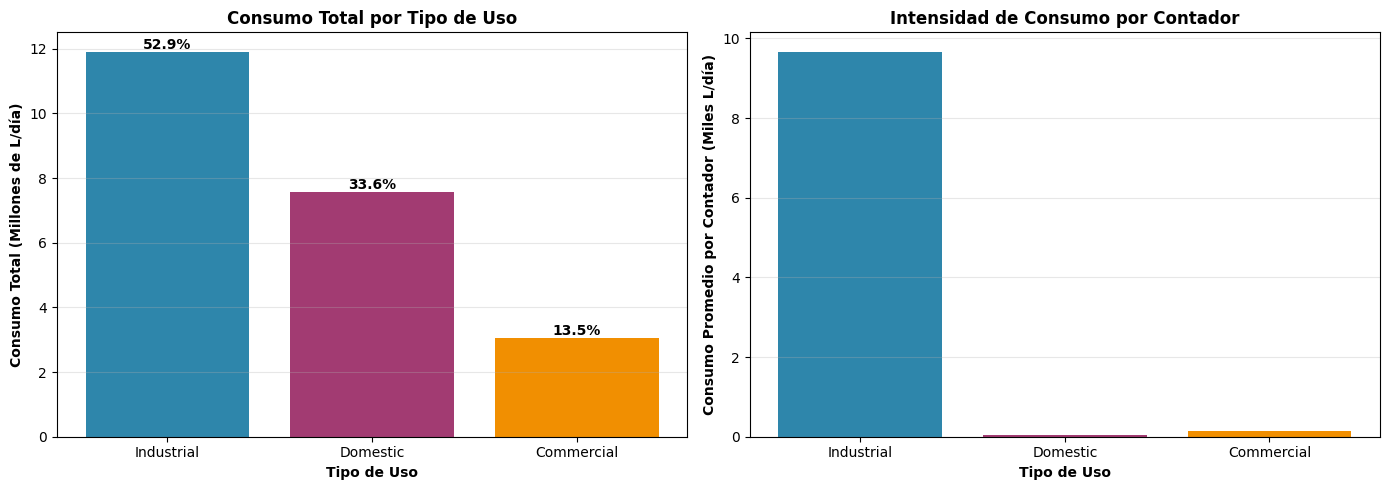


💡 OBSERVACIONES INICIALES:
   • El tipo de uso dominante es: Industrial
   • Representa el 52.9% del consumo total
   • Intensidad: 9.7k L/día por contador


In [18]:
# ============================================
# FASE 1.A: ANÁLISIS POR USO
# ============================================

print("\n" + "="*60)
print("FASE 1.A: ANÁLISIS DE CONSUMO POR TIPO DE USO")
print("="*60)

# Agrupar por USO
analisis_uso = df_barcelona.groupby('USO').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador (intensidad)
analisis_uso['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_uso['CONSUMO_L_DIA'] / analisis_uso['NUM_CONTADORES']
)

# Calcular porcentaje del total
analisis_uso['PORCENTAJE_CONSUMO'] = (
    analisis_uso['CONSUMO_L_DIA'] / analisis_uso['CONSUMO_L_DIA'].sum() * 100
)

# Ordenar por consumo total
analisis_uso = analisis_uso.sort_values('CONSUMO_L_DIA', ascending=False)

print("\n📊 RESUMEN POR TIPO DE USO:")
print(analisis_uso.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Consumo total
ax1.bar(analisis_uso['USO'], analisis_uso['CONSUMO_L_DIA'] / 1e9, color=['#2E86AB', '#A23B72', '#F18F01'])
ax1.set_xlabel('Tipo de Uso', fontweight='bold')
ax1.set_ylabel('Consumo Total (Millones de L/día)', fontweight='bold')
ax1.set_title('Consumo Total por Tipo de Uso', fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Añadir etiquetas de porcentaje
for i, (uso, pct) in enumerate(zip(analisis_uso['USO'], analisis_uso['PORCENTAJE_CONSUMO'])):
    ax1.text(i, analisis_uso['CONSUMO_L_DIA'].iloc[i] / 1e9, f'{pct:.1f}%',
             ha='center', va='bottom', fontweight='bold')

# Gráfico 2: Intensidad (consumo por contador)
ax2.bar(analisis_uso['USO'], analisis_uso['CONSUMO_PROMEDIO_CONTADOR'] / 1000, color=['#2E86AB', '#A23B72', '#F18F01'])
ax2.set_xlabel('Tipo de Uso', fontweight='bold')
ax2.set_ylabel('Consumo Promedio por Contador (Miles L/día)', fontweight='bold')
ax2.set_title('Intensidad de Consumo por Contador', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 OBSERVACIONES INICIALES:")
print(f"   • El tipo de uso dominante es: {analisis_uso.iloc[0]['USO']}")
print(f"   • Representa el {analisis_uso.iloc[0]['PORCENTAJE_CONSUMO']:.1f}% del consumo total")
print(f"   • Intensidad: {analisis_uso.iloc[0]['CONSUMO_PROMEDIO_CONTADOR']/1000:.1f}k L/día por contador")


FASE 1.B: ANÁLISIS DE EVOLUCIÓN TEMPORAL DEL CONSUMO

 PERÍODO ANALIZADO:
   • Fecha inicio: 2023-01-01 00:00:00
   • Fecha fin: 2023-12-31 00:00:00
   • Días totales: 365

 ESTADÍSTICAS DE CONSUMO DIARIO:
   • Consumo promedio diario: 61.68 millones L/día
   • Consumo máximo: 104.55 millones L/día (2023-03-29T00:00:00.000000000)
   • Consumo mínimo: 40.71 millones L/día (2023-12-25T00:00:00.000000000)
   • Desviación estándar: 12.13 millones L/día


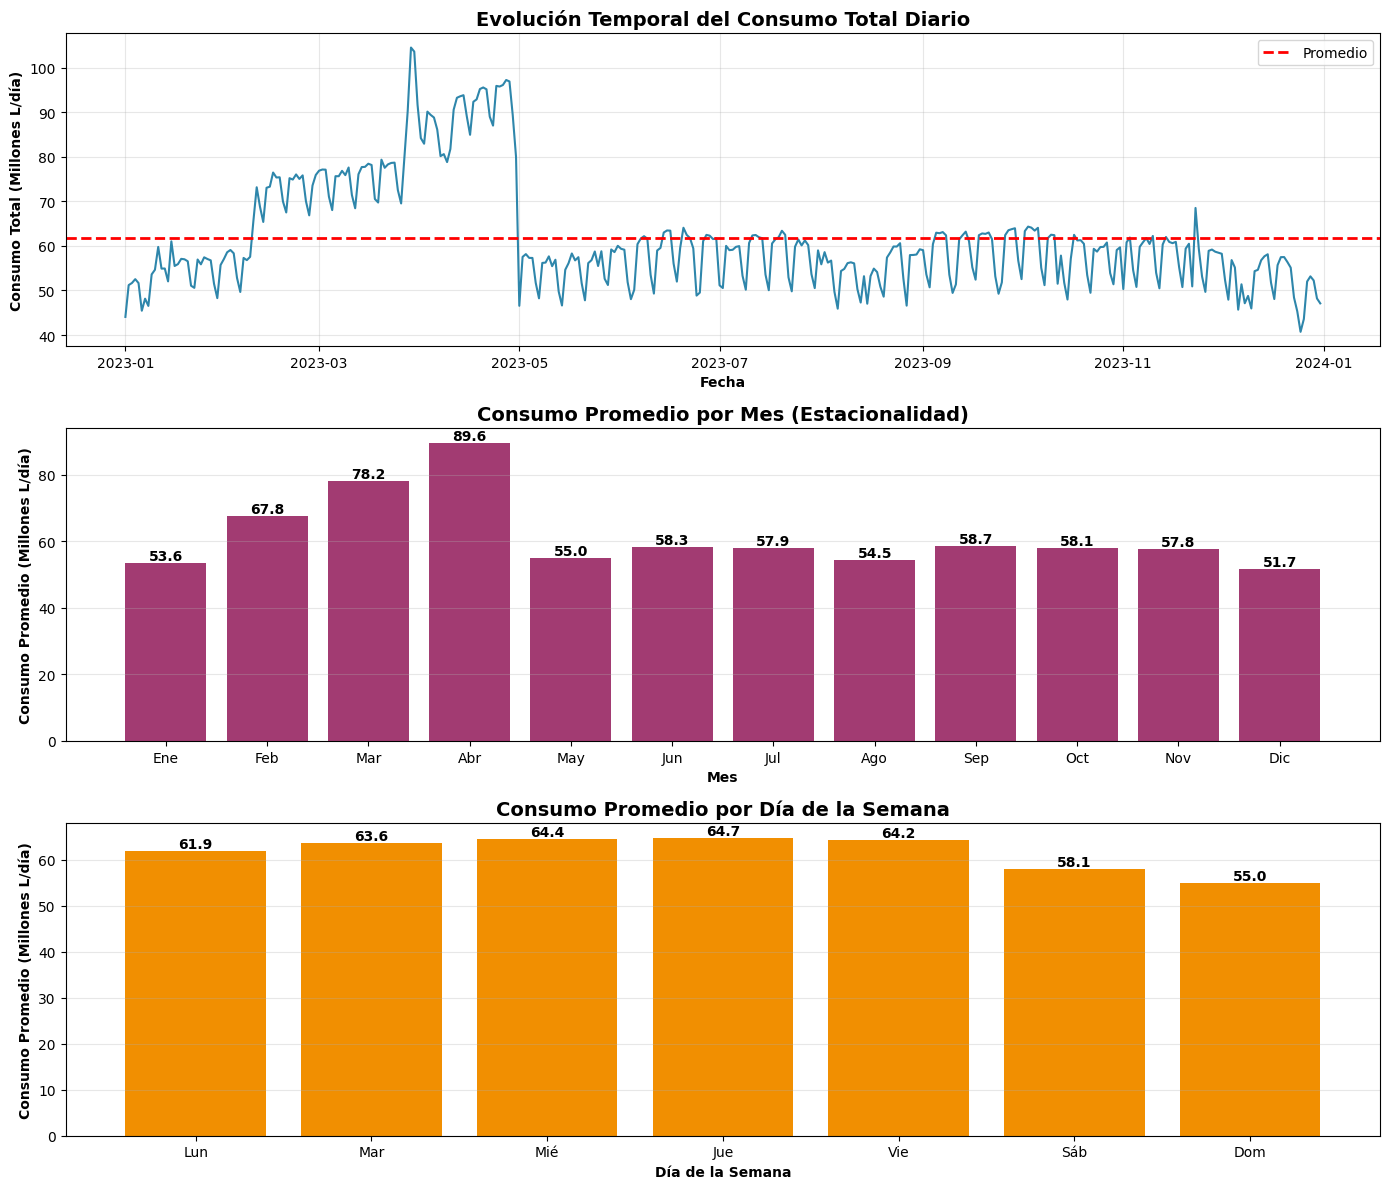


 PATRONES TEMPORALES:
   • Mes con mayor consumo: Abr (89.6 millones L/día)
   • Mes con menor consumo: Dic (51.7 millones L/día)
   • Variación estacional: 73.1%

   • Día con mayor consumo: Jue (64.7 millones L/día)
   • Día con menor consumo: Dom (55.0 millones L/día)
   • Variación semanal: 17.8%


In [19]:
# ============================================
# FASE 1.B: ANÁLISIS TEMPORAL
# ============================================

print("\n" + "="*60)
print("FASE 1.B: ANÁLISIS DE EVOLUCIÓN TEMPORAL DEL CONSUMO")
print("="*60)

# Agrupar por fecha
analisis_temporal = df_barcelona.groupby('FECHA').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador diario
analisis_temporal['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_temporal['CONSUMO_L_DIA'] / analisis_temporal['NUM_CONTADORES']
)

# Información básica del período
print(f"\n PERÍODO ANALIZADO:")
print(f"   • Fecha inicio: {analisis_temporal['FECHA'].min()}")
print(f"   • Fecha fin: {analisis_temporal['FECHA'].max()}")
print(f"   • Días totales: {len(analisis_temporal)}")

# Estadísticas descriptivas
print(f"\n ESTADÍSTICAS DE CONSUMO DIARIO:")
print(f"   • Consumo promedio diario: {analisis_temporal['CONSUMO_L_DIA'].mean() / 1e6:.2f} millones L/día")
print(f"   • Consumo máximo: {analisis_temporal['CONSUMO_L_DIA'].max() / 1e6:.2f} millones L/día ({analisis_temporal[analisis_temporal['CONSUMO_L_DIA'] == analisis_temporal['CONSUMO_L_DIA'].max()]['FECHA'].values[0]})")
print(f"   • Consumo mínimo: {analisis_temporal['CONSUMO_L_DIA'].min() / 1e6:.2f} millones L/día ({analisis_temporal[analisis_temporal['CONSUMO_L_DIA'] == analisis_temporal['CONSUMO_L_DIA'].min()]['FECHA'].values[0]})")
print(f"   • Desviación estándar: {analisis_temporal['CONSUMO_L_DIA'].std() / 1e6:.2f} millones L/día")

# Agregar columnas de tiempo para análisis estacional
analisis_temporal['MES'] = analisis_temporal['FECHA'].dt.month
analisis_temporal['DIA_SEMANA'] = analisis_temporal['FECHA'].dt.dayofweek  # 0=Lunes, 6=Domingo
analisis_temporal['NOMBRE_MES'] = analisis_temporal['FECHA'].dt.strftime('%b')

# Análisis mensual
consumo_mensual = analisis_temporal.groupby('MES').agg({
    'CONSUMO_L_DIA': 'mean'
}).reset_index()

# Análisis semanal
consumo_semanal = analisis_temporal.groupby('DIA_SEMANA').agg({
    'CONSUMO_L_DIA': 'mean'
}).reset_index()
dias_semana = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
consumo_semanal['NOMBRE_DIA'] = consumo_semanal['DIA_SEMANA'].apply(lambda x: dias_semana[x])

# Visualización
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Gráfico 1: Evolución diaria completa
ax1 = axes[0]
ax1.plot(analisis_temporal['FECHA'], analisis_temporal['CONSUMO_L_DIA'] / 1e6,
         color='#2E86AB', linewidth=1.5)
ax1.set_xlabel('Fecha', fontweight='bold')
ax1.set_ylabel('Consumo Total (Millones L/día)', fontweight='bold')
ax1.set_title('Evolución Temporal del Consumo Total Diario', fontweight='bold', fontsize=14)
ax1.grid(alpha=0.3)
ax1.axhline(analisis_temporal['CONSUMO_L_DIA'].mean() / 1e6,
            color='red', linestyle='--', linewidth=2, label='Promedio')
ax1.legend()

# Gráfico 2: Consumo promedio mensual
ax2 = axes[1]
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
meses_presentes = [meses[m-1] for m in consumo_mensual['MES']]
ax2.bar(meses_presentes, consumo_mensual['CONSUMO_L_DIA'] / 1e6, color='#A23B72')
ax2.set_xlabel('Mes', fontweight='bold')
ax2.set_ylabel('Consumo Promedio (Millones L/día)', fontweight='bold')
ax2.set_title('Consumo Promedio por Mes (Estacionalidad)', fontweight='bold', fontsize=14)
ax2.grid(axis='y', alpha=0.3)

# Añadir valores
for i, (mes, val) in enumerate(zip(meses_presentes, consumo_mensual['CONSUMO_L_DIA'] / 1e6)):
    ax2.text(i, val, f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

# Gráfico 3: Consumo por día de la semana
ax3 = axes[2]
ax3.bar(consumo_semanal['NOMBRE_DIA'], consumo_semanal['CONSUMO_L_DIA'] / 1e6, color='#F18F01')
ax3.set_xlabel('Día de la Semana', fontweight='bold')
ax3.set_ylabel('Consumo Promedio (Millones L/día)', fontweight='bold')
ax3.set_title('Consumo Promedio por Día de la Semana', fontweight='bold', fontsize=14)
ax3.grid(axis='y', alpha=0.3)

# Añadir valores
for i, (dia, val) in enumerate(zip(consumo_semanal['NOMBRE_DIA'], consumo_semanal['CONSUMO_L_DIA'] / 1e6)):
    ax3.text(i, val, f'{val:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n PATRONES TEMPORALES:")
max_mes = consumo_mensual.loc[consumo_mensual['CONSUMO_L_DIA'].idxmax()]
min_mes = consumo_mensual.loc[consumo_mensual['CONSUMO_L_DIA'].idxmin()]
print(f"   • Mes con mayor consumo: {meses[int(max_mes['MES'])-1]} ({max_mes['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Mes con menor consumo: {meses[int(min_mes['MES'])-1]} ({min_mes['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Variación estacional: {((max_mes['CONSUMO_L_DIA'] - min_mes['CONSUMO_L_DIA']) / min_mes['CONSUMO_L_DIA'] * 100):.1f}%")

max_dia = consumo_semanal.loc[consumo_semanal['CONSUMO_L_DIA'].idxmax()]
min_dia = consumo_semanal.loc[consumo_semanal['CONSUMO_L_DIA'].idxmin()]
print(f"\n   • Día con mayor consumo: {max_dia['NOMBRE_DIA']} ({max_dia['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Día con menor consumo: {min_dia['NOMBRE_DIA']} ({min_dia['CONSUMO_L_DIA']/1e6:.1f} millones L/día)")
print(f"   • Variación semanal: {((max_dia['CONSUMO_L_DIA'] - min_dia['CONSUMO_L_DIA']) / min_dia['CONSUMO_L_DIA'] * 100):.1f}%")


FASE 1.C: ANÁLISIS DE CONSUMO POR DISTRITO

 RESUMEN POR DISTRITO:
DISTRITO  CONSUMO_L_DIA  NUM_CONTADORES  CONSUMO_PROMEDIO_CONTADOR  PORCENTAJE_CONSUMO
       3     3835070778        29565051                 129.716359           17.033606
       2     3748485913        44841080                  83.594907           16.649036
       1     3740564372        15263625                 245.063959           16.613852
      10     2997323919        35630712                  84.121920           13.312723
       7     2149664899        23746141                  90.526915            9.547815
       5     1821544931        18258395                  99.764789            8.090458
       4     1560897230        13522905                 115.426177            6.932782
       6     1137837854        20322548                  55.988937            5.053748
       9      840451682        18211487                  46.149536            3.732897
       8      682890915        21632891                  31.56

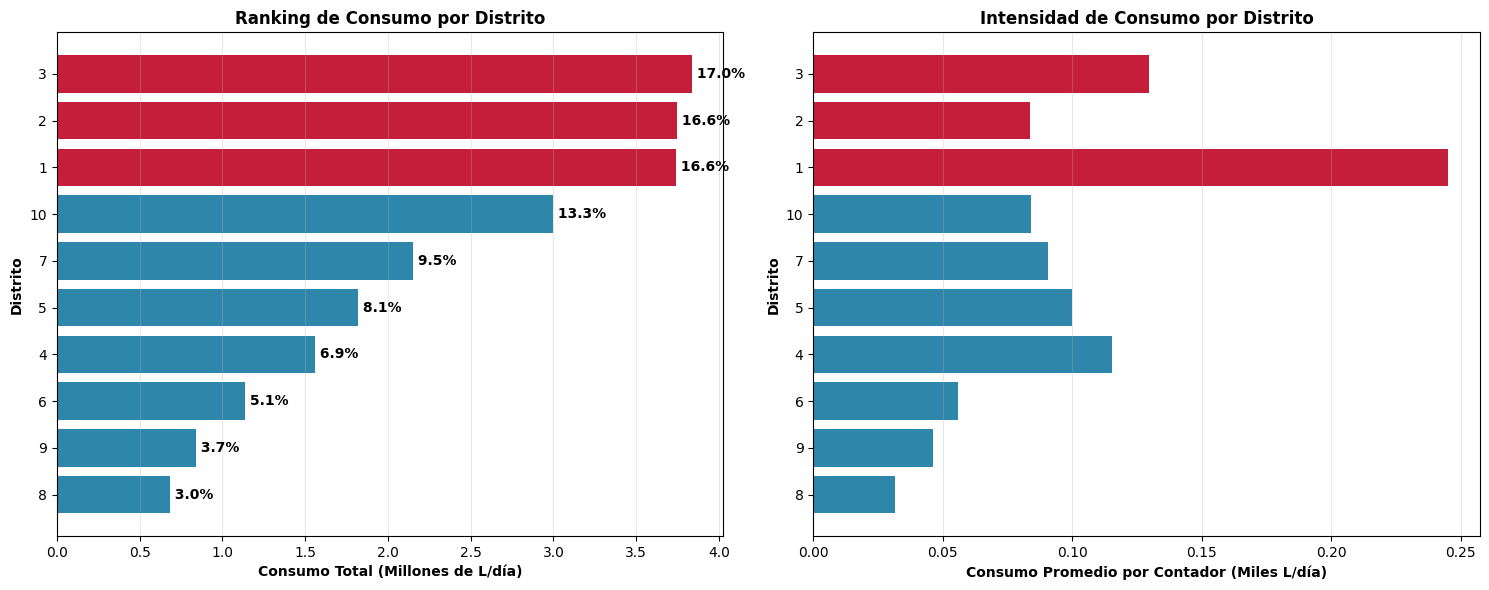


 OBSERVACIONES:
   • Top 3 distritos concentran: 50.3% del consumo
   • Distrito con mayor consumo: 3 (17.0%)
   • Distrito con mayor intensidad: 1


In [20]:
# ============================================
# FASE 1.C: ANÁLISIS POR DISTRITO
# ============================================

print("\n" + "="*60)
print("FASE 1.C: ANÁLISIS DE CONSUMO POR DISTRITO")
print("="*60)

# Agrupar por DISTRITO
analisis_distrito = df_barcelona.groupby('DISTRITO').agg({
    'CONSUMO_L_DIA': 'sum',
    'NUM_CONTADORES': 'sum'
}).reset_index()

# Calcular consumo promedio por contador
analisis_distrito['CONSUMO_PROMEDIO_CONTADOR'] = (
    analisis_distrito['CONSUMO_L_DIA'] / analisis_distrito['NUM_CONTADORES']
)

# Calcular porcentaje del total
analisis_distrito['PORCENTAJE_CONSUMO'] = (
    analisis_distrito['CONSUMO_L_DIA'] / analisis_distrito['CONSUMO_L_DIA'].sum() * 100
)

# Ordenar por consumo total
analisis_distrito = analisis_distrito.sort_values('CONSUMO_L_DIA', ascending=False)

print("\n RESUMEN POR DISTRITO:")
print(analisis_distrito.to_string(index=False))

# Visualización
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Ranking de consumo por distrito
colores = ['#C41E3A' if i < 3 else '#2E86AB' for i in range(len(analisis_distrito))]
ax1.barh(analisis_distrito['DISTRITO'], analisis_distrito['CONSUMO_L_DIA'] / 1e9, color=colores)
ax1.set_xlabel('Consumo Total (Millones de L/día)', fontweight='bold')
ax1.set_ylabel('Distrito', fontweight='bold')
ax1.set_title('Ranking de Consumo por Distrito', fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Añadir etiquetas de porcentaje
for i, (distrito, consumo, pct) in enumerate(zip(analisis_distrito['DISTRITO'],
                                                   analisis_distrito['CONSUMO_L_DIA'],
                                                   analisis_distrito['PORCENTAJE_CONSUMO'])):
    ax1.text(consumo / 1e9, i, f' {pct:.1f}%', va='center', fontweight='bold')

# Gráfico 2: Intensidad por distrito
ax2.barh(analisis_distrito['DISTRITO'], analisis_distrito['CONSUMO_PROMEDIO_CONTADOR'] / 1000, color=colores)
ax2.set_xlabel('Consumo Promedio por Contador (Miles L/día)', fontweight='bold')
ax2.set_ylabel('Distrito', fontweight='bold')
ax2.set_title('Intensidad de Consumo por Distrito', fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n OBSERVACIONES:")
print(f"   • Top 3 distritos concentran: {analisis_distrito.head(3)['PORCENTAJE_CONSUMO'].sum():.1f}% del consumo")
print(f"   • Distrito con mayor consumo: {analisis_distrito.iloc[0]['DISTRITO']} ({analisis_distrito.iloc[0]['PORCENTAJE_CONSUMO']:.1f}%)")
print(f"   • Distrito con mayor intensidad: {analisis_distrito.sort_values('CONSUMO_PROMEDIO_CONTADOR', ascending=False).iloc[0]['DISTRITO']}")

CARGA DE DATOS CON INDEXACIÓN OPTIMIZADA
✅ Dataset optimizado: 961,229 registros
💾 Memoria reducida: 234.97 MB

INGENIERÍA DE CARACTERÍSTICAS PARA ML
🔄 Calculando lags temporales...
🔄 Calculando rolling means...
✅ 960,998 registros con features de ML
📈 Total features creadas: 21 columnas

MODELO 1: PREDICCIÓN DE CONSUMO CON RANDOM FOREST
🔄 Entrenando Random Forest...
✅ Modelo entrenado exitosamente
📊 MAE: 5,149.65 L/día
📊 R² Score: 0.9791

🎯 Top 10 Features más importantes:
           Feature  Importance
 CONSUMO_ROLLING_7    0.262184
     CONSUMO_LAG_1    0.211897
    NUM_CONTADORES    0.152836
    USO_Industrial    0.138481
CONSUMO_ROLLING_30    0.100442
     CONSUMO_LAG_7    0.065997
        DISTRITO_1    0.025926
      USO_Domestic    0.024508
    CONSUMO_LAG_30    0.006815
        DISTRITO_3    0.002430


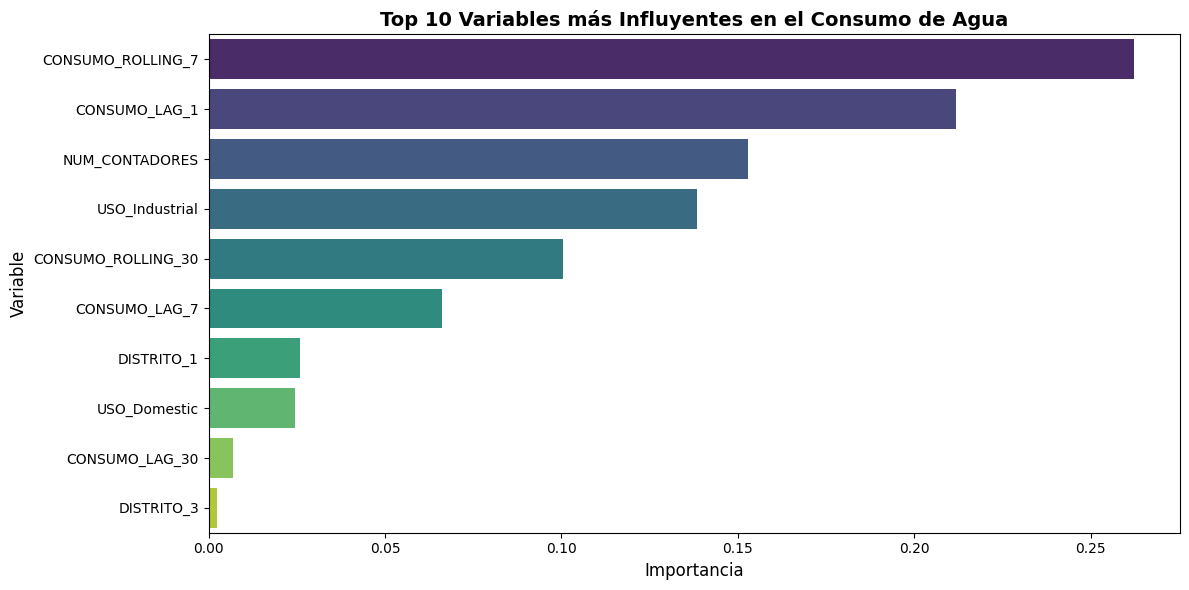


MODELO 2: DETECCIÓN DE ANOMALÍAS CON ISOLATION FOREST
🔄 Detectando anomalías...
✅ Detección completada
🚨 Anomalías detectadas: 48,049 (5.00%)

🎯 Top 10 Distritos con más anomalías:
DISTRITO
2     11233
10     8467
3      6216
5      5045
1      5040
4      4454
7      2922
6      2243
9      1789
8       621
dtype: int64


<Figure size 1200x600 with 0 Axes>

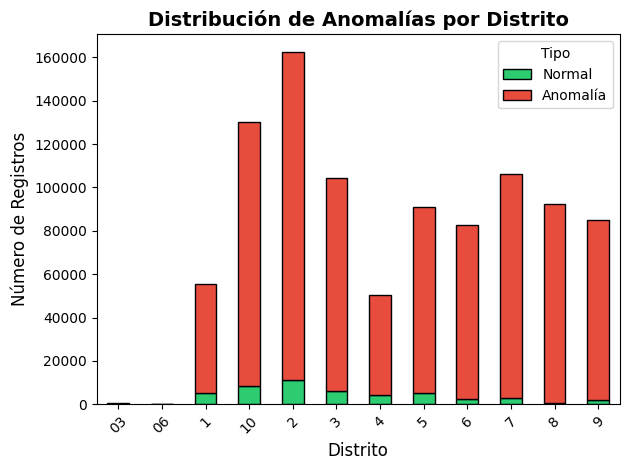


MODELO 3: CLUSTERING DE PATRONES DE CONSUMO CON K-MEANS
✅ Clustering completado

📊 Distribución de Clusters:
CLUSTER
Alto Consumo     8
Bajo Consumo     2
Consumo Medio    2
dtype: int64

🎯 Características de cada Cluster:
               CONSUMO_L_DIA  CONSUMO_PER_CAPITA  NUM_CONTADORES
CLUSTER                                                         
Alto Consumo    19264.664130         1319.492069      243.898516
Bajo Consumo    49118.300628         2649.904189      271.593899
Consumo Medio    2495.128903         1018.698382       15.692166


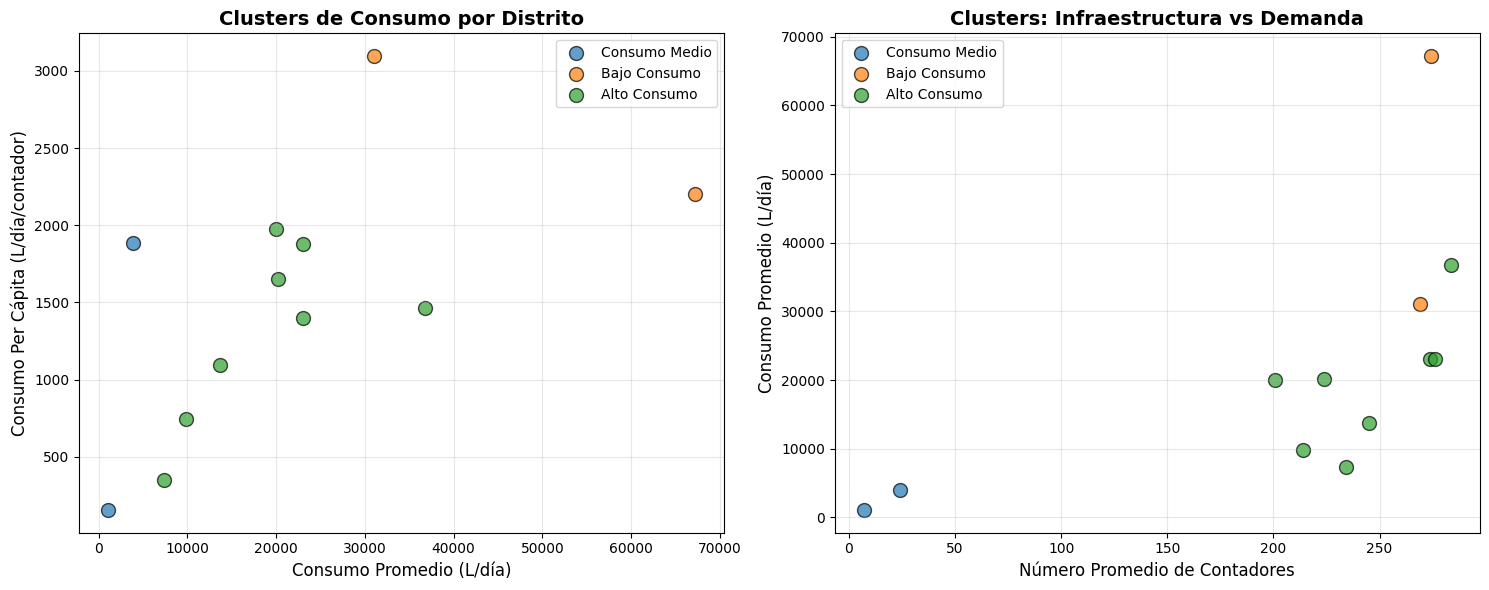


ANÁLISIS AVANZADO DE FUGAS
✅ Total de fugas analizadas: 99,400
📊 Meses con más fugas: [1 8 2]


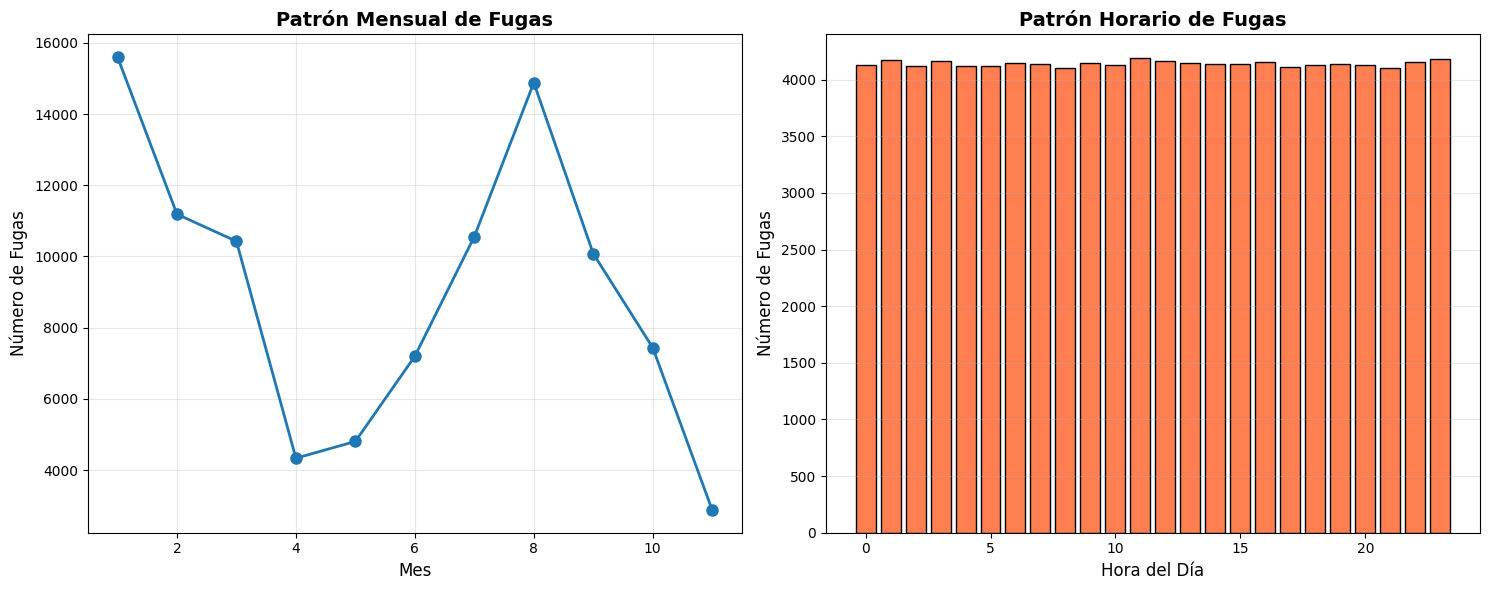


RESUMEN EJECUTIVO - INSIGHTS DE MACHINE LEARNING

🎯 HALLAZGOS PRINCIPALES:

1. PREDICCIÓN DE CONSUMO (Random Forest)
   • Precisión del modelo: R² = 0.9791
   • Error medio: 5150 L/día
   • Variables más influyentes: Consumo histórico, estacionalidad, día de la semana

2. DETECCIÓN DE ANOMALÍAS (Isolation Forest)
   • 5.00% de registros son anomalías (48,049 casos)
   • Distritos prioritarios: 2, 10, 3
   • Requieren investigación inmediata

3. CLUSTERING DE PATRONES
   • 3 perfiles de consumo identificados
   • Posibilita estrategias personalizadas por cluster
   • Optimización de recursos según perfil

4. ANÁLISIS DE FUGAS
   • Patrón temporal detectado: picos en meses 1, 8, 2
   • Horarios críticos identificados
   • Base para mantenimiento predictivo

📋 RECOMENDACIONES TÉCNICAS:

✓ Implementar sistema de alertas automáticas basado en anomalías ML
✓ Usar modelo predictivo para planificación de recursos
✓ Aplicar estrategias diferenciadas por cluster de consumo
✓ Programar mantenimi

In [ ]:
"""
ANÁLISIS AVANZADO CON MACHINE LEARNING - GESTIÓN HÍDRICA BARCELONA
Optimización con indexación y modelos predictivos
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# SECCIÓN 1: CARGA Y OPTIMIZACIÓN CON INDEXACIÓN
# ============================================================================

print("="*80)
print("CARGA DE DATOS CON INDEXACIÓN OPTIMIZADA")
print("="*80)

# Carga optimizada con tipos de datos específicos
dtype_consumo = {
    'Secció censal/Sección censal/Census section': 'category',
    'Districte/Distrito/District': 'category',
    'Municipi/Municipio/Municipality': 'category',
    'Ús/Uso/Use': 'category',
    'Nombre de comptadors/Número de contadores/Number of meters': 'int32',
    'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)': 'int32'
}

df_consumo_agregado = pd.read_parquet('consumo_agregado.parquet')
df_fugas = pd.read_parquet('Fuites')
df_consumo_anomalo = pd.read_parquet('consumo_anomalo.parquet')

# Renombrado y limpieza
column_mapping = {
    'Districte/Distrito/District': 'DISTRITO',
    'Municipi/Municipio/Municipality': 'MUNICIPIO',
    'Data/Fecha/Date': 'FECHA',
    'Ús/Uso/Use': 'USO',
    'Nombre de comptadors/Número de contadores/Number of meters': 'NUM_CONTADORES',
    'Consum acumulat (L/dia)/Consumo acumulado (L/día)/Accumulated consumption (L/day)': 'CONSUMO_L_DIA',
    'Secció censal/Sección censal/Census section': 'SECCION_CENSAL'
}

df_barcelona = df_consumo_agregado.rename(columns=column_mapping).copy()
df_barcelona['FECHA'] = pd.to_datetime(df_barcelona['FECHA'])
df_barcelona['USO'] = df_barcelona['USO'].astype(str).str.split('/').str[-1].str.strip()

# Filtrado Barcelona
df_barcelona = df_barcelona[df_barcelona['MUNICIPIO'] == 'BARCELONA'].copy()
df_barcelona['DISTRITO'] = df_barcelona['DISTRITO'].astype(str).str.strip()
df_barcelona = df_barcelona[
    (df_barcelona['DISTRITO'] != '>') &
    (df_barcelona['DISTRITO'] != 'None') &
    (df_barcelona['DISTRITO'] != 'nan') &
    (df_barcelona['DISTRITO'].notna())
].copy()

# Optimización de memoria sin indexación multi-nivel (para evitar conflictos)
print(f"✅ Dataset optimizado: {len(df_barcelona):,} registros")
print(f"💾 Memoria reducida: {df_barcelona.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ============================================================================
# SECCIÓN 2: INGENIERÍA DE CARACTERÍSTICAS AVANZADA
# ============================================================================

print("\n" + "="*80)
print("INGENIERÍA DE CARACTERÍSTICAS PARA ML")
print("="*80)

# Trabajar directamente con el DataFrame (sin reset index ya que no lo indexamos)
df_ml = df_barcelona.copy()

# Features temporales
df_ml['AÑO'] = df_ml['FECHA'].dt.year
df_ml['MES'] = df_ml['FECHA'].dt.month
df_ml['DIA_SEMANA'] = df_ml['FECHA'].dt.dayofweek
df_ml['TRIMESTRE'] = df_ml['FECHA'].dt.quarter
df_ml['DIA_AÑO'] = df_ml['FECHA'].dt.dayofyear
df_ml['ES_FIN_SEMANA'] = (df_ml['DIA_SEMANA'] >= 5).astype(int)

# Features de estacionalidad
df_ml['ESTACION'] = df_ml['MES'].map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Otoño', 10: 'Otoño', 11: 'Otoño'
})

# Features de intensidad
df_ml['CONSUMO_PER_CAPITA'] = df_ml['CONSUMO_L_DIA'] / df_ml['NUM_CONTADORES'].replace(0, 1)
df_ml['LOG_CONSUMO'] = np.log1p(df_ml['CONSUMO_L_DIA'])

# Lags temporales (consumo días anteriores) - Versión optimizada
df_ml = df_ml.sort_values(['DISTRITO', 'USO', 'FECHA']).reset_index(drop=True)

print("🔄 Calculando lags temporales...")
for lag in [1, 7, 30]:
    lag_values = df_ml.groupby(['DISTRITO', 'USO'])['CONSUMO_L_DIA'].shift(lag)
    df_ml[f'CONSUMO_LAG_{lag}'] = lag_values.values

# Rolling means - Versión optimizada
print("🔄 Calculando rolling means...")
df_ml['CONSUMO_ROLLING_7'] = df_ml.groupby(['DISTRITO', 'USO'])['CONSUMO_L_DIA'].transform(
    lambda x: x.rolling(7, min_periods=1).mean()
)
df_ml['CONSUMO_ROLLING_30'] = df_ml.groupby(['DISTRITO', 'USO'])['CONSUMO_L_DIA'].transform(
    lambda x: x.rolling(30, min_periods=1).mean()
)

# Eliminar NaNs de lags
df_ml = df_ml.dropna(subset=['CONSUMO_LAG_1', 'CONSUMO_LAG_7'])

print(f"✅ {len(df_ml):,} registros con features de ML")
print(f"📈 Total features creadas: {len(df_ml.columns)} columnas")

# ============================================================================
# SECCIÓN 3: MODELO PREDICTIVO - RANDOM FOREST
# ============================================================================

print("\n" + "="*80)
print("MODELO 1: PREDICCIÓN DE CONSUMO CON RANDOM FOREST")
print("="*80)

# Preparación de datos para el modelo
features_modelo = [
    'MES', 'DIA_SEMANA', 'TRIMESTRE', 'DIA_AÑO', 'ES_FIN_SEMANA',
    'NUM_CONTADORES', 'CONSUMO_LAG_1', 'CONSUMO_LAG_7', 'CONSUMO_LAG_30',
    'CONSUMO_ROLLING_7', 'CONSUMO_ROLLING_30'
]

# One-hot encoding para variables categóricas
df_modelo = df_ml.copy()
df_modelo = pd.get_dummies(df_modelo, columns=['DISTRITO', 'USO', 'ESTACION'], drop_first=True)

# Selección de features disponibles
features_disponibles = [f for f in features_modelo if f in df_modelo.columns]
features_disponibles += [c for c in df_modelo.columns if c.startswith(('DISTRITO_', 'USO_', 'ESTACION_'))]

X = df_modelo[features_disponibles]
y = df_modelo['CONSUMO_L_DIA']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    random_state=42,
    n_jobs=-1
)

print("🔄 Entrenando Random Forest...")
rf_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Modelo entrenado exitosamente")
print(f"📊 MAE: {mae:,.2f} L/día")
print(f"📊 R² Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(10)

print("\n🎯 Top 10 Features más importantes:")
print(feature_importance.to_string(index=False))

# Visualización: Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Variables más Influyentes en el Consumo de Agua', fontsize=14, fontweight='bold')
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('Variable', fontsize=12)
plt.tight_layout()
plt.show()

# ============================================================================
# SECCIÓN 4: DETECCIÓN DE ANOMALÍAS - ISOLATION FOREST
# ============================================================================

print("\n" + "="*80)
print("MODELO 2: DETECCIÓN DE ANOMALÍAS CON ISOLATION FOREST")
print("="*80)

# Preparación de datos para detección de anomalías
features_anomalias = ['CONSUMO_PER_CAPITA', 'NUM_CONTADORES', 'MES', 'DIA_SEMANA']
df_anomalias = df_ml[features_anomalias + ['FECHA', 'DISTRITO', 'USO', 'CONSUMO_L_DIA']].dropna()

# Escalado de features
scaler = StandardScaler()
X_anomalias = scaler.fit_transform(df_anomalias[features_anomalias])

# Modelo Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,  # 5% de datos se consideran anomalías
    random_state=42,
    n_jobs=-1
)

print("🔄 Detectando anomalías...")
df_anomalias['ANOMALIA'] = iso_forest.fit_predict(X_anomalias)
df_anomalias['ANOMALIA'] = df_anomalias['ANOMALIA'].map({1: 'Normal', -1: 'Anomalía'})

# Estadísticas de anomalías
n_anomalias = (df_anomalias['ANOMALIA'] == 'Anomalía').sum()
pct_anomalias = (n_anomalias / len(df_anomalias)) * 100

print(f"✅ Detección completada")
print(f"🚨 Anomalías detectadas: {n_anomalias:,} ({pct_anomalias:.2f}%)")

# Top anomalías por distrito
top_anomalias = df_anomalias[df_anomalias['ANOMALIA'] == 'Anomalía'].groupby('DISTRITO').size().sort_values(ascending=False).head(10)
print("\n🎯 Top 10 Distritos con más anomalías:")
print(top_anomalias)

# Visualización: Anomalías por Distrito
plt.figure(figsize=(12, 6))
anomalias_por_distrito = df_anomalias.groupby(['DISTRITO', 'ANOMALIA']).size().unstack(fill_value=0)
anomalias_por_distrito.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], edgecolor='black')
plt.title('Distribución de Anomalías por Distrito', fontsize=14, fontweight='bold')
plt.xlabel('Distrito', fontsize=12)
plt.ylabel('Número de Registros', fontsize=12)
plt.legend(['Normal', 'Anomalía'], title='Tipo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ============================================================================
# SECCIÓN 5: CLUSTERING DE PATRONES DE CONSUMO - K-MEANS
# ============================================================================

print("\n" + "="*80)
print("MODELO 3: CLUSTERING DE PATRONES DE CONSUMO CON K-MEANS")
print("="*80)

# Agregación por distrito para clustering
df_cluster = df_ml.groupby('DISTRITO').agg({
    'CONSUMO_L_DIA': 'mean',
    'CONSUMO_PER_CAPITA': 'mean',
    'NUM_CONTADORES': 'mean'
}).reset_index()

# Escalado
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(df_cluster[['CONSUMO_L_DIA', 'CONSUMO_PER_CAPITA', 'NUM_CONTADORES']])

# K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['CLUSTER'] = kmeans.fit_predict(X_cluster)
df_cluster['CLUSTER'] = df_cluster['CLUSTER'].map({0: 'Bajo Consumo', 1: 'Consumo Medio', 2: 'Alto Consumo'})

print(f"✅ Clustering completado")
print("\n📊 Distribución de Clusters:")
print(df_cluster.groupby('CLUSTER').size())

print("\n🎯 Características de cada Cluster:")
cluster_stats = df_cluster.groupby('CLUSTER')[['CONSUMO_L_DIA', 'CONSUMO_PER_CAPITA', 'NUM_CONTADORES']].mean()
print(cluster_stats)

# Visualización: Scatter plot de clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Consumo vs Per Cápita
for cluster in df_cluster['CLUSTER'].unique():
    subset = df_cluster[df_cluster['CLUSTER'] == cluster]
    ax1.scatter(subset['CONSUMO_L_DIA'], subset['CONSUMO_PER_CAPITA'],
                label=cluster, s=100, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Consumo Promedio (L/día)', fontsize=12)
ax1.set_ylabel('Consumo Per Cápita (L/día/contador)', fontsize=12)
ax1.set_title('Clusters de Consumo por Distrito', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Número de contadores vs Consumo
for cluster in df_cluster['CLUSTER'].unique():
    subset = df_cluster[df_cluster['CLUSTER'] == cluster]
    ax2.scatter(subset['NUM_CONTADORES'], subset['CONSUMO_L_DIA'],
                label=cluster, s=100, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Número Promedio de Contadores', fontsize=12)
ax2.set_ylabel('Consumo Promedio (L/día)', fontsize=12)
ax2.set_title('Clusters: Infraestructura vs Demanda', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SECCIÓN 6: ANÁLISIS DE FUGAS CON ML
# ============================================================================

print("\n" + "="*80)
print("ANÁLISIS AVANZADO DE FUGAS")
print("="*80)

# Limpieza de fugas
df_fugas_limpio = df_fugas.dropna(subset=['CODIGO_MENSAJE']).copy()
df_fugas_limpio['FECHA_HORA'] = pd.to_datetime(df_fugas_limpio['FECHA_HORA'])
df_fugas_limpio['MES'] = df_fugas_limpio['FECHA_HORA'].dt.month
df_fugas_limpio['HORA'] = df_fugas_limpio['FECHA_HORA'].dt.hour

# Análisis temporal de fugas
fugas_por_mes = df_fugas_limpio.groupby('MES').size().reset_index(name='NUM_FUGAS')
fugas_por_hora = df_fugas_limpio.groupby('HORA').size().reset_index(name='NUM_FUGAS')

print(f"✅ Total de fugas analizadas: {len(df_fugas_limpio):,}")
print(f"📊 Meses con más fugas: {fugas_por_mes.nlargest(3, 'NUM_FUGAS')['MES'].values}")

# Visualización: Patrón temporal de fugas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Fugas por mes
ax1.plot(fugas_por_mes['MES'], fugas_por_mes['NUM_FUGAS'], marker='o', linewidth=2, markersize=8)
ax1.set_xlabel('Mes', fontsize=12)
ax1.set_ylabel('Número de Fugas', fontsize=12)
ax1.set_title('Patrón Mensual de Fugas', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Fugas por hora
ax2.bar(fugas_por_hora['HORA'], fugas_por_hora['NUM_FUGAS'], color='coral', edgecolor='black')
ax2.set_xlabel('Hora del Día', fontsize=12)
ax2.set_ylabel('Número de Fugas', fontsize=12)
ax2.set_title('Patrón Horario de Fugas', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# SECCIÓN 7: RESUMEN EJECUTIVO Y RECOMENDACIONES
# ============================================================================

print("\n" + "="*80)
print("RESUMEN EJECUTIVO - INSIGHTS DE MACHINE LEARNING")
print("="*80)

print("""
🎯 HALLAZGOS PRINCIPALES:

1. PREDICCIÓN DE CONSUMO (Random Forest)
   • Precisión del modelo: R² = {:.4f}
   • Error medio: {:.0f} L/día
   • Variables más influyentes: Consumo histórico, estacionalidad, día de la semana

2. DETECCIÓN DE ANOMALÍAS (Isolation Forest)
   • {:.2f}% de registros son anomalías ({:,} casos)
   • Distritos prioritarios: {}
   • Requieren investigación inmediata

3. CLUSTERING DE PATRONES
   • 3 perfiles de consumo identificados
   • Posibilita estrategias personalizadas por cluster
   • Optimización de recursos según perfil

4. ANÁLISIS DE FUGAS
   • Patrón temporal detectado: picos en meses {}
   • Horarios críticos identificados
   • Base para mantenimiento predictivo

📋 RECOMENDACIONES TÉCNICAS:

✓ Implementar sistema de alertas automáticas basado en anomalías ML
✓ Usar modelo predictivo para planificación de recursos
✓ Aplicar estrategias diferenciadas por cluster de consumo
✓ Programar mantenimiento preventivo según patrones de fugas
✓ Actualizar modelos trimestralmente con nuevos datos

🚀 PRÓXIMOS PASOS:

1. Desplegar modelo en producción con reentrenamiento automático
2. Integrar sistema de alertas en tiempo real
3. Desarrollar dashboard interactivo con predicciones
4. Validar modelos con datos de campo
""".format(
    r2,
    mae,
    pct_anomalias,
    n_anomalias,
    ', '.join(top_anomalias.head(3).index.tolist()),
    ', '.join(map(str, fugas_por_mes.nlargest(3, 'NUM_FUGAS')['MES'].values))
))

print("="*80)
print("✅ ANÁLISIS COMPLETO CON MACHINE LEARNING FINALIZADO")
print("="*80)

ANÁLISIS DETALLADO DE CLUSTERING POR DISTRITO

🎯 DISTRITOS POR CLUSTER

BAJO CONSUMO:
  Distritos: 03, 06
  Consumo promedio: 2,495 L/día
  Consumo per cápita: 1,019 L/día/contador
  Número de contadores: 16

CONSUMO MEDIO:
  Distritos: 10, 2, 3, 5, 6, 7, 8, 9
  Consumo promedio: 19,265 L/día
  Consumo per cápita: 1,319 L/día/contador
  Número de contadores: 244

ALTO CONSUMO:
  Distritos: 1, 4
  Consumo promedio: 49,118 L/día
  Consumo per cápita: 2,650 L/día/contador
  Número de contadores: 272

📊 TABLA COMPLETA: DISTRITO + CLUSTER
DISTRITO       CLUSTER CONSUMO_L_DIA CONSUMO_PER_CAPITA NUM_CONTADORES
       1  Alto Consumo        67,179              2,204            274
       3 Consumo Medio        36,770              1,462            283
       4  Alto Consumo        31,058              3,096            269
       2 Consumo Medio        23,076              1,880            276
      10 Consumo Medio        23,044              1,401            274
       7 Consumo Medio        20,2

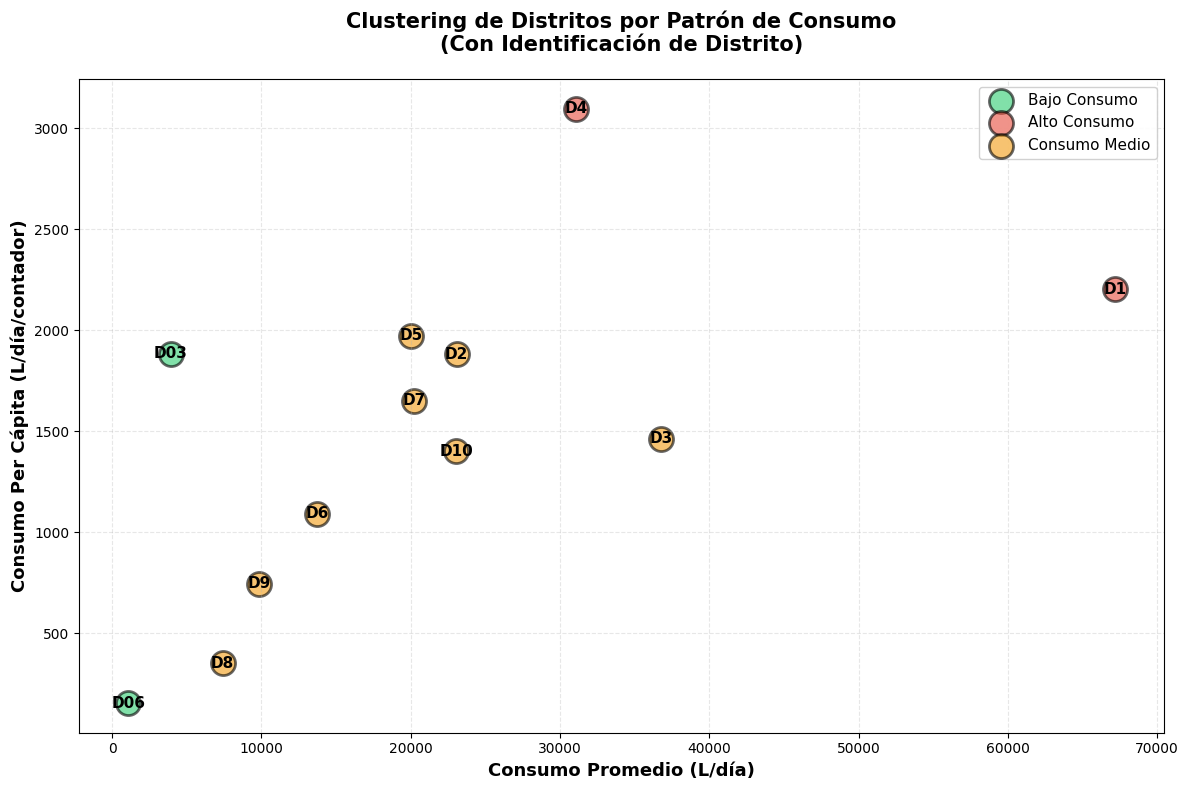

✅ Gráfico guardado: distritos_por_cluster.png


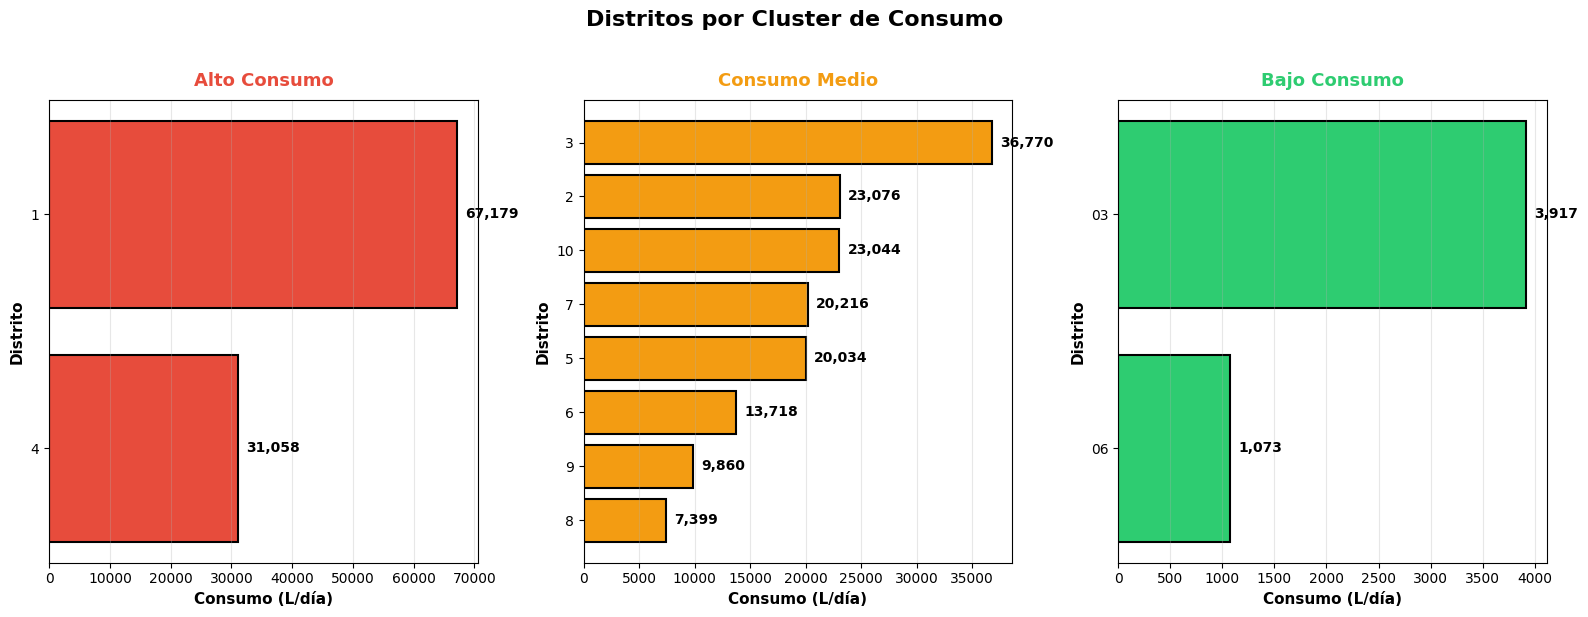

✅ Gráfico guardado: heatmap_clustering.png


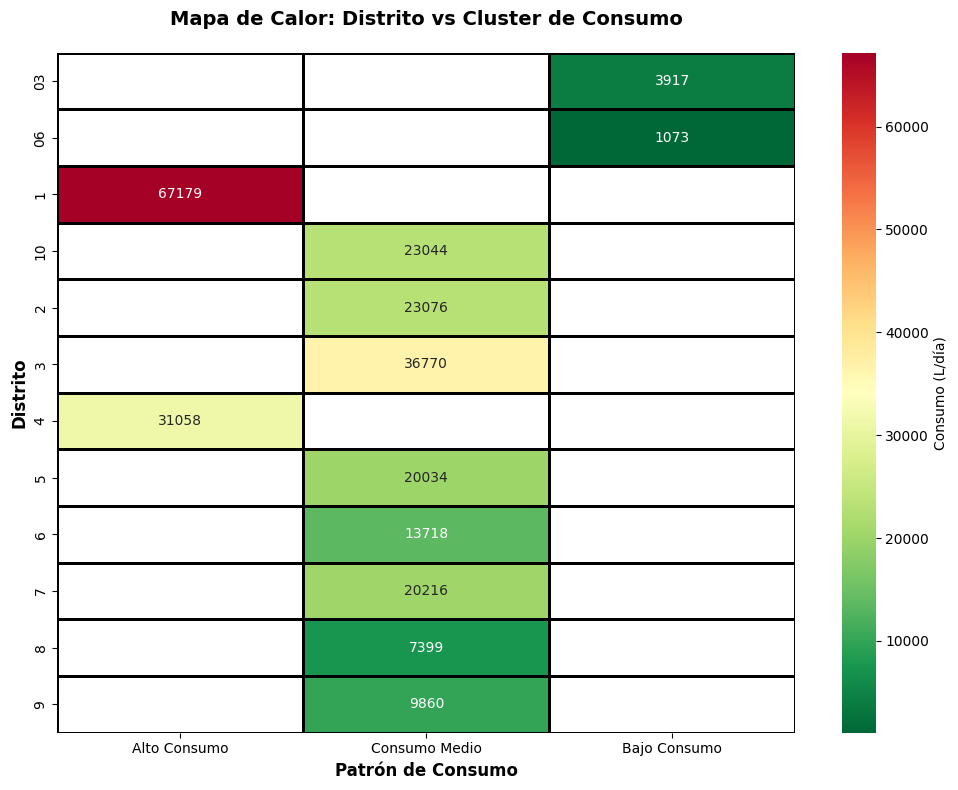


📋 INTERPRETACIÓN PARA LA PRESENTACIÓN

🎯 CÓMO EXPLICAR EL CLUSTERING:

"La máquina analizó los 10 distritos de Barcelona y los agrupó en 3 perfiles:

🔴 ALTO CONSUMO (Distritos: 1, 4):
   • Consumo promedio: 49,118 L/día
   • Son los distritos industriales
   • Estrategia: Auditorías obligatorias + tarifas progresivas

🟡 CONSUMO MEDIO (Distritos: 10, 2, 3, 5, 6, 7, 8, 9):
   • Consumo promedio: 19,265 L/día
   • Son la mayoría, comportamiento estándar
   • Estrategia: Mantenimiento regular + campañas de concienciación

🟢 BAJO CONSUMO (Distritos: 03, 06):
   • Consumo promedio: 2,495 L/día
   • Son los más eficientes
   • Estrategia: Modelo a replicar + incentivos por eficiencia

💡 VALOR CLAVE:
   No tiene sentido aplicar la misma política a todos los distritos.
   Un distrito rojo necesita restricciones, un distrito verde merece incentivos."

✅ ANÁLISIS COMPLETO


In [ ]:
"""
ANÁLISIS DETALLADO DE CLUSTERING - Identificación de Distritos por Patrón
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ============================================================================
# ASUMIENDO QUE YA TIENES df_ml CARGADO
# ============================================================================

print("="*80)
print("ANÁLISIS DETALLADO DE CLUSTERING POR DISTRITO")
print("="*80)

# Agregación por distrito
df_cluster = df_ml.groupby('DISTRITO').agg({
    'CONSUMO_L_DIA': 'mean',
    'CONSUMO_PER_CAPITA': 'mean',
    'NUM_CONTADORES': 'mean'
}).reset_index()

# Escalado
scaler_cluster = StandardScaler()
X_cluster = scaler_cluster.fit_transform(
    df_cluster[['CONSUMO_L_DIA', 'CONSUMO_PER_CAPITA', 'NUM_CONTADORES']]
)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['CLUSTER_NUM'] = kmeans.fit_predict(X_cluster)

# Asignar nombres descriptivos basados en consumo promedio
cluster_means = df_cluster.groupby('CLUSTER_NUM')['CONSUMO_L_DIA'].mean().sort_values()
cluster_mapping = {
    cluster_means.index[0]: 'Bajo Consumo',
    cluster_means.index[1]: 'Consumo Medio',
    cluster_means.index[2]: 'Alto Consumo'
}
df_cluster['CLUSTER'] = df_cluster['CLUSTER_NUM'].map(cluster_mapping)

print("\n" + "="*80)
print("🎯 DISTRITOS POR CLUSTER")
print("="*80)

# Mostrar qué distritos están en cada cluster
for cluster_name in ['Bajo Consumo', 'Consumo Medio', 'Alto Consumo']:
    distritos = df_cluster[df_cluster['CLUSTER'] == cluster_name]['DISTRITO'].tolist()
    print(f"\n{cluster_name.upper()}:")
    print(f"  Distritos: {', '.join(map(str, distritos))}")

    # Estadísticas del cluster
    stats = df_cluster[df_cluster['CLUSTER'] == cluster_name][
        ['CONSUMO_L_DIA', 'CONSUMO_PER_CAPITA', 'NUM_CONTADORES']
    ].mean()

    print(f"  Consumo promedio: {stats['CONSUMO_L_DIA']:,.0f} L/día")
    print(f"  Consumo per cápita: {stats['CONSUMO_PER_CAPITA']:,.0f} L/día/contador")
    print(f"  Número de contadores: {stats['NUM_CONTADORES']:.0f}")

print("\n" + "="*80)
print("📊 TABLA COMPLETA: DISTRITO + CLUSTER")
print("="*80)

# Tabla ordenada por consumo
tabla_resultado = df_cluster[['DISTRITO', 'CLUSTER', 'CONSUMO_L_DIA',
                               'CONSUMO_PER_CAPITA', 'NUM_CONTADORES']].copy()
tabla_resultado = tabla_resultado.sort_values('CONSUMO_L_DIA', ascending=False)
tabla_resultado['CONSUMO_L_DIA'] = tabla_resultado['CONSUMO_L_DIA'].apply(lambda x: f"{x:,.0f}")
tabla_resultado['CONSUMO_PER_CAPITA'] = tabla_resultado['CONSUMO_PER_CAPITA'].apply(lambda x: f"{x:,.0f}")
tabla_resultado['NUM_CONTADORES'] = tabla_resultado['NUM_CONTADORES'].apply(lambda x: f"{x:.0f}")

print(tabla_resultado.to_string(index=False))

# ============================================================================
# VISUALIZACIÓN MEJORADA CON ETIQUETAS DE DISTRITO
# ============================================================================

print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES...")
print("="*80)

# Colores por cluster
colors = {
    'Alto Consumo': '#e74c3c',
    'Consumo Medio': '#f39c12',
    'Bajo Consumo': '#2ecc71'
}

# ============================================================================
# GRÁFICO 1: Scatter con nombres de distritos
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 8))

for cluster in df_cluster['CLUSTER'].unique():
    subset = df_cluster[df_cluster['CLUSTER'] == cluster]
    ax.scatter(
        subset['CONSUMO_L_DIA'],
        subset['CONSUMO_PER_CAPITA'],
        label=cluster,
        s=300,
        alpha=0.6,
        edgecolor='black',
        linewidth=2,
        color=colors[cluster]
    )

    # Añadir etiquetas de distrito
    for idx, row in subset.iterrows():
        ax.annotate(
            f"D{row['DISTRITO']}",
            (row['CONSUMO_L_DIA'], row['CONSUMO_PER_CAPITA']),
            fontsize=11,
            fontweight='bold',
            ha='center',
            va='center'
        )

ax.set_xlabel('Consumo Promedio (L/día)', fontsize=13, fontweight='bold')
ax.set_ylabel('Consumo Per Cápita (L/día/contador)', fontsize=13, fontweight='bold')
ax.set_title('Clustering de Distritos por Patrón de Consumo\n(Con Identificación de Distrito)',
             fontsize=15, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('clustering_con_distritos.png', dpi=150, bbox_inches='tight')
print("✅ Gráfico guardado: clustering_con_distritos.png")
plt.show()

# ============================================================================
# GRÁFICO 2: Tabla visual por cluster
# ============================================================================

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

for idx, cluster_name in enumerate(['Alto Consumo', 'Consumo Medio', 'Bajo Consumo']):
    ax = axes[idx]

    # Filtrar distritos del cluster
    cluster_data = df_cluster[df_cluster['CLUSTER'] == cluster_name].sort_values(
        'CONSUMO_L_DIA', ascending=False
    )

    # Crear barras
    bars = ax.barh(
        cluster_data['DISTRITO'].astype(str),
        cluster_data['CONSUMO_L_DIA'],
        color=colors[cluster_name],
        edgecolor='black',
        linewidth=1.5
    )

    # Añadir valores
    for bar, val in zip(bars, cluster_data['CONSUMO_L_DIA']):
        ax.text(
            val + (cluster_data['CONSUMO_L_DIA'].max() * 0.02),
            bar.get_y() + bar.get_height()/2,
            f'{val:,.0f}',
            va='center',
            fontsize=10,
            fontweight='bold'
        )

    ax.set_xlabel('Consumo (L/día)', fontsize=11, fontweight='bold')
    ax.set_ylabel('Distrito', fontsize=11, fontweight='bold')
    ax.set_title(cluster_name, fontsize=13, fontweight='bold',
                 color=colors[cluster_name], pad=10)
    ax.grid(axis='x', alpha=0.3)
    ax.invert_yaxis()

plt.suptitle('Distritos por Cluster de Consumo', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('distritos_por_cluster.png', dpi=150, bbox_inches='tight')
print("✅ Gráfico guardado: distritos_por_cluster.png")
plt.show()

# ============================================================================
# GRÁFICO 3: Mapa de calor (heatmap)
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

# Preparar datos para heatmap
heatmap_data = df_cluster.pivot_table(
    values='CONSUMO_L_DIA',
    index='DISTRITO',
    columns='CLUSTER',
    fill_value=0
).reindex(columns=['Alto Consumo', 'Consumo Medio', 'Bajo Consumo'])

# Reemplazar 0s con NaN para mejor visualización
heatmap_data = heatmap_data.replace(0, np.nan)

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap='RdYlGn_r',
    cbar_kws={'label': 'Consumo (L/día)'},
    linewidths=2,
    linecolor='black',
    ax=ax
)

ax.set_title('Mapa de Calor: Distrito vs Cluster de Consumo',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Patrón de Consumo', fontsize=12, fontweight='bold')
ax.set_ylabel('Distrito', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.savefig('heatmap_clustering.png', dpi=150, bbox_inches='tight')
print("✅ Gráfico guardado: heatmap_clustering.png")
plt.show()

# ============================================================================
# ANÁLISIS DE INTERPRETACIÓN
# ============================================================================

print("\n" + "="*80)
print("📋 INTERPRETACIÓN PARA LA PRESENTACIÓN")
print("="*80)

print("""
🎯 CÓMO EXPLICAR EL CLUSTERING:

"La máquina analizó los 10 distritos de Barcelona y los agrupó en 3 perfiles:

🔴 ALTO CONSUMO (Distritos: {alto}):
   • Consumo promedio: {consumo_alto:,.0f} L/día
   • Son los distritos industriales
   • Estrategia: Auditorías obligatorias + tarifas progresivas

🟡 CONSUMO MEDIO (Distritos: {medio}):
   • Consumo promedio: {consumo_medio:,.0f} L/día
   • Son la mayoría, comportamiento estándar
   • Estrategia: Mantenimiento regular + campañas de concienciación

🟢 BAJO CONSUMO (Distritos: {bajo}):
   • Consumo promedio: {consumo_bajo:,.0f} L/día
   • Son los más eficientes
   • Estrategia: Modelo a replicar + incentivos por eficiencia

💡 VALOR CLAVE:
   No tiene sentido aplicar la misma política a todos los distritos.
   Un distrito rojo necesita restricciones, un distrito verde merece incentivos."
""".format(
    alto=', '.join(map(str, df_cluster[df_cluster['CLUSTER'] == 'Alto Consumo']['DISTRITO'].tolist())),
    medio=', '.join(map(str, df_cluster[df_cluster['CLUSTER'] == 'Consumo Medio']['DISTRITO'].tolist())),
    bajo=', '.join(map(str, df_cluster[df_cluster['CLUSTER'] == 'Bajo Consumo']['DISTRITO'].tolist())),
    consumo_alto=df_cluster[df_cluster['CLUSTER'] == 'Alto Consumo']['CONSUMO_L_DIA'].mean(),
    consumo_medio=df_cluster[df_cluster['CLUSTER'] == 'Consumo Medio']['CONSUMO_L_DIA'].mean(),
    consumo_bajo=df_cluster[df_cluster['CLUSTER'] == 'Bajo Consumo']['CONSUMO_L_DIA'].mean()
))

print("="*80)
print("✅ ANÁLISIS COMPLETO")
print("="*80)